In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy
import statsmodels as sm

In [3]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [4]:
df_train.describe()

,t,P,D,V
count,6000.000000,6000.000000,6000.000000,6000.000000
mean,2999.500000,1.749325,0.020723,320.967000
std,1732.195139,0.495783,0.004952,206.947326
min,0.000000,0.540104,0.008844,0.000000
25%,1499.750000,1.420871,0.017440,149.750000
50%,2999.500000,1.756668,0.020801,298.000000
75%,4499.250000,2.158961,0.024825,463.000000
max,5999.000000,2.699272,0.029980,1016.000000


,position,inventory pnl,dividend pnl,financing pnl,total pnl
t,,,,,
0,0,0.000000,0.000000,0.000000,0.000000
1,0,0.000000,0.000000,0.000000,0.000000
2,1,0.000000,0.000000,0.000000,0.000000
3,0,0.067461,0.010243,-0.007003,0.070701
4,0,-0.000000,0.000000,-0.000000,0.000000
...,...,...,...,...,...
5995,0,0.008433,0.021440,-0.021321,0.008551
5996,-1,0.000000,0.000000,-0.000000,0.000000
5997,0,0.131267,-0.021331,0.015351,0.125287


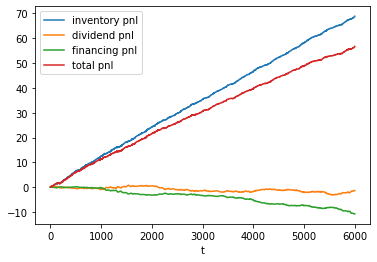

In [5]:
import solution
import backtest
backtest.run()

In [6]:
def run_wrapper(fn_to_backtest, plot=True):
    make_market = fn_to_backtest
    res = backtest.run(plot=plot)
    return res

In [7]:
def make_make_market(b0, b1, halfspread, x_cutoff, large_pos_bias):
    def make_market(p, d, v, x):
        price = b0*p[0] + b1*p[1]
        dividend = b0*d[0] + b1*d[1]
        buy = price - halfspread
        sell = price + halfspread
        if x > 0:
            sell *= (1-large_pos_bias)**x
        if x < 0:
            buy *= (1+large_pos_bias)**abs(x)
        if x <= -x_cutoff:
            sell = 100000
        if x >= x_cutoff:
            buy = 0.000001

        return np.array([buy, sell])
    return make_market

In [8]:

best_so_far = []
best_res = -float("inf")
for i in range(10):
    p0 = i/10
    p1 = 1-p0
    for hs in range(8):
        halfspread = hs/200
        for cutoff in [3,4,5]:
            # for bias_unscaled in range(20):
            for bias_unscaled in range(10):
                bias = bias_unscaled/100
                f = make_make_market(p0, p1, halfspread, cutoff, bias)
                df = backtest._run(f, df_train)
                res = df.sum()[-1]
                if res > best_res:
                    best_res = res
                    best_so_far.append((p0, p1, halfspread, cutoff, bias))
                    print(best_so_far[-1])
                    print(f"with result/tot pnl {best_res}")

# f = make_make_market(0.2, 0.8, 0.03, 3, 0.02)
# df = backtest._run(f, df_train)
# df.sum()
# df.plot()

(0.0, 1.0, 0.0, 3, 0.0)
with result/tot pnl 12.654464352990034
(0.0, 1.0, 0.0, 3, 0.01)
with result/tot pnl 47.14230569290304
(0.0, 1.0, 0.0, 3, 0.02)
with result/tot pnl 47.47938869131925
(0.0, 1.0, 0.0, 3, 0.03)
with result/tot pnl 49.07785939418917
(0.0, 1.0, 0.0, 3, 0.04)
with result/tot pnl 49.29141065657818
(0.0, 1.0, 0.0, 3, 0.06)
with result/tot pnl 49.43125361853036


KeyboardInterrupt: 

In [9]:
f = make_make_market(0.2, 0.8, 0.03, 3, 0.02)
df = backtest._run(f, df_train)
df.sum()

position        -47.000000
inventory pnl    68.844009
dividend pnl     -1.385499
financing pnl   -10.764738
total pnl        56.693773
dtype: float64